<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

## Загрузка данных

In [1]:
#!pip install phik

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('/datasets/insurance.csv')

In [4]:
data.sample(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4712,1,25.0,42000.0,0,0
3633,1,30.0,52300.0,0,0
1527,1,36.0,43200.0,0,0
726,1,20.0,5300.0,1,0
2752,1,27.0,21100.0,1,0


In [5]:
data.shape

(5000, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


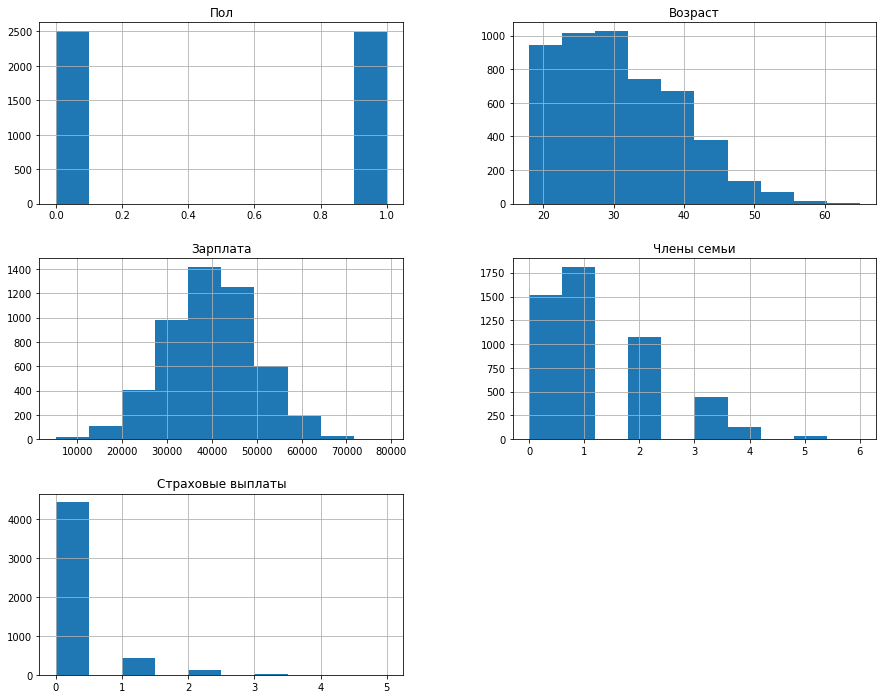

In [8]:
data.hist(figsize=(15, 12));

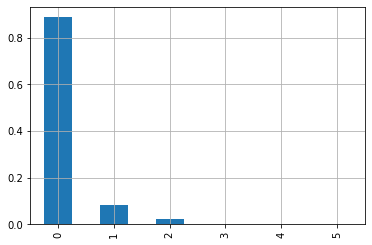

In [9]:
data['Страховые выплаты'].value_counts(normalize=True).plot(kind='bar', grid=True);

In [10]:
data[data['Страховые выплаты'] != 0]['Страховые выплаты'].value_counts()

1    423
2    115
3     18
4      7
5      1
Name: Страховые выплаты, dtype: int64

In [11]:
data[data['Страховые выплаты'] != 0]['Страховые выплаты'].value_counts().sum()

564

In [12]:
# Все признаки, кроме пола
data.loc[:, ~data.columns.isin(['Пол'])].corr(method='spearman')

,Возраст,Зарплата,Члены семьи,Страховые выплаты
Возраст,1.000000,-0.020238,-0.001503,0.548589
Зарплата,-0.020238,1.000000,-0.025492,-0.005549
Члены семьи,-0.001503,-0.025492,1.000000,-0.029210
Страховые выплаты,0.548589,-0.005549,-0.029210,1.000000


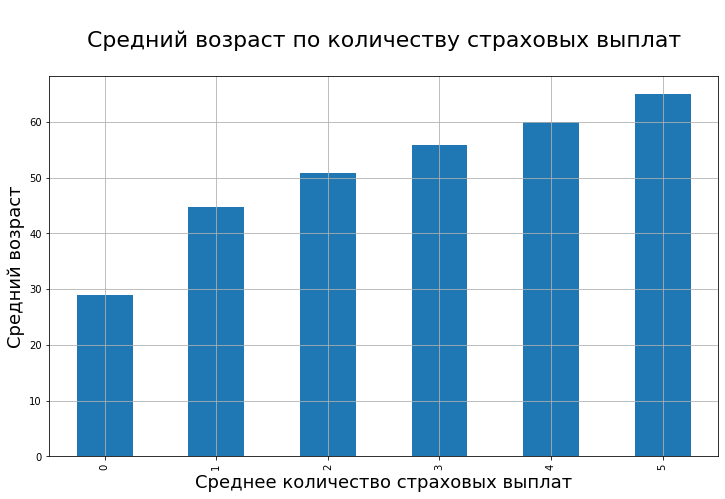

In [13]:
(
    data
    .pivot_table(index='Страховые выплаты', values='Возраст', aggfunc='mean')
    .reset_index()
    .plot(x='Страховые выплаты', y='Возраст', kind='bar', grid=True, figsize=(12, 7), legend=False)
    .set_title('\n' + 'Средний возраст по количеству страховых выплат' + '\n', fontsize=22)
);
plt.ylabel('Средний возраст', fontsize=18);
plt.xlabel('Среднее количество страховых выплат', fontsize=18);

### Вывод

Качество данных приемлимое, целевой признак коррелирует только с одним не целевым признаком, а именно с возрастом, корреляция Спирмена на уровне 0.55, посредственный уровень корреляции. Если использовать линейную регрессию то из-за метода наименьших квадратов используемого в линейной регрессии качество модели будет не самым лучшим

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** Нет, качество линейной регрессии не изменится.

**Обоснование:** Умножение матрицы признаков на обратную матрицу эквивалентно умножению коэффициентов регрессионной модели. Мы получим в этом случае единичную матрицу. Это связано с особенностью вычисления обратной матрицы, после вычисления определителя и алгебраических дополнений исходной, при подборе дополнительных миноров, главная диагональ матрицы не учитывается при поиске минимального размера ошибки. Ну это насколько я понял.

**Обоснование:** 

Предсказания для новой матрицы:
$$
a_P = XPw
$$

Вектор весов:
$$
w = ((XP)^T (XP))^{-1} (XP)^T y
$$

Подставим в формулу расчёта предсказаний значение вектора весов:
$$
a_P = (XP)((XP)^T (XP))^{-1} (XP)^T y
$$

Раскроем скобки с транспонированием:
$$
a_P = (XP)(P^TX^TXP)^{-1}P^TX^T y
$$

Выносим ***P*** за скобки, так как она обратимая (по условию):
$$
a_P = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

Ввиду того, что выражения:
$$
PP^{-1}
$$
и
$$
P^T(P^T)^{-1}
$$
равны ***E***, получаем:

$$
a_P = X(X^T X)^{-1}X^T y
$$

Из чего следует:
$$
a_P= Xw=a
$$

## Алгоритм преобразования

**Алгоритм**

Алгоритм прост как я, просто создать рандомную матрицу для умножения на исходную матрицу признаков (с количеством столбцов - 4), проверить обратимость, затем умножить тренировучную матрицу на рандомную матрицу, получим зашифрованные данные, то же сделать и для тестовой выборки. Вся суть в том, чтобы перемножить матрицы на одну и ту же рандомную матрицу, изменить данные и обучить модель и проверить на тестовой.

**Обоснование**

Если мы умножим признаки обучающего и тестового набора данных на ту же обратную матрицу, то результат прогнозирования будет являться произведением нашей измененной таблицы с признаками, умноженный на те же значения, что и признаки для обучения. Проверили работу этого алгоритма в следующем разделе.

## Проверка алгоритма

In [14]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
display(features_train.shape, features_test.shape)

(3750, 4)

(1250, 4)

In [15]:
P = np.random.normal(3, size=(4,4))
np.linalg.inv(P)

array([[ -0.79589724, -21.35174239,  23.90010315,  -2.85538861],
       [  1.14911252,  18.57608445, -20.71016045,   2.17755358],
       [  0.32903403,   8.9422274 , -10.34145964,   1.68692913],
       [ -0.31141217,  -1.04852455,   1.5030261 ,  -0.23376193]])

Матрица обратима

In [16]:
train_m = features_train @ P
train_m.columns = features_train.columns

test_m = features_test @ P
test_m.columns = features_test.columns

display(train_m.sample(5))
display(test_m.sample(5))

,Пол,Возраст,Зарплата,Члены семьи
2206,155952.365453,131889.057792,124104.684431,219217.426429
204,173721.283649,146914.552720,138245.519726,244192.581960
1546,164089.556673,138768.858308,130581.771471,230650.759010
2482,91592.807780,77462.273738,72885.262975,128752.634431
4550,125412.295755,106061.953181,99800.028718,176291.837373


,Пол,Возраст,Зарплата,Члены семьи
3179,158891.202694,134371.356034,126448.075272,223345.341101
2184,105675.118549,89368.743710,84095.600745,148544.359417
4453,79631.766067,67344.817765,63369.242372,111937.524647
1911,152171.005301,128689.776850,121096.640769,213901.293801
4345,135425.725382,114526.538393,107774.055142,190359.450308


In [17]:
model = LinearRegression()
model.fit(features_train, target_train)
predict = model.predict(features_test)
print('Не измененная матрица r2: ', round(r2_score(target_test, predict), 2))
print('Не измененная матрица MSE: ', round(mean_squared_error(target_test, predict), 2))

Не измененная матрица r2:  0.44
Не измененная матрица MSE:  0.12


In [18]:
change_matrix_model = LinearRegression()
change_matrix_model.fit(train_m, target_train)
predict_change_matrix = change_matrix_model.predict(test_m)
print('Измененная матрица r2: ', round(r2_score(target_test, predict_change_matrix), 2))
print('Измененная матрица MSE: ', round(mean_squared_error(target_test, predict_change_matrix), 2))

Измененная матрица r2:  0.44
Измененная матрица MSE:  0.12


### Вывод

В страховой компании "Хоть потоп" перед нами была поставлена задача обеспечить защиту данных наших клиентов и создать метод преобразования данных, который затруднил бы восстановление личной информации.

Преобразование должно было быть выполнено таким образом, чтобы качество моделей машинного обучения, определяемое результатом нашего алгоритма, не снижалось.

Результатом нашей работы стала разработка алгоритма, который преобразовал данные путем умножения признаков исходных данных на обратимую матрицу P. Это преобразование создало модифицированную матрицу признаков, с зашифрованными данными и, при сравнении с моделью из пакета scikit-learn, сохранила значения r2 и MSE без изменений.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
В целом, работа хорошая. Ты молодец! Остались небольшие доработки. Нужно добавить теоретическое доказательство, выводы после каждого раздела, проверить алгоритм преобразований. Доделывай и присылай на повторную проверку.

Жду твоих исправлений 😊
</font></b>
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
Нужно доработать теоретическое доказательство и алгоритм преобразований. При возникновении трудностей можно обратиться к преподавателю по проектам в чате "Пачки"
</font></b>
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
    
Отлично! Проект принят! 👏 Поздравляю и желаю удачи!
    
    
Оставлю несколько дополнительных материалов. Теория по обратным матрицам: https://www.berdov.com/works/matrix/obratnaya-matrica/. Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
Подробнее про аналогичный алгоритм: https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf
</font></b>
</div>